<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Norouzinezhad

**Student ID**: 400102182



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [7]:
data = pd.read_csv("Boston.csv")
print("data:")
print(data.head())
print()
print("dataset's shape:")
print(data.shape)

data:
      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

dataset's shape:
(506, 14)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [3]:

X = data.drop(columns=['MEDV'])  
y = data['MEDV']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print("Train R^2 score:", r2_train)
print("Test R^2 score:", r2_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("\nCoefficients:")
print(coefficients)


Train R^2 score: 0.7508856358979672
Test R^2 score: 0.6687594935356316
Train RMSE: 4.6520331848801675
Test RMSE: 4.9286021826653394

Coefficients:
    Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

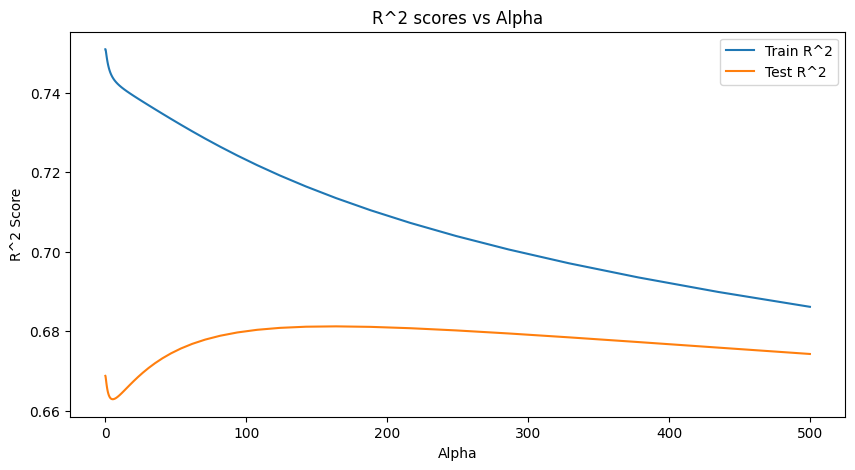

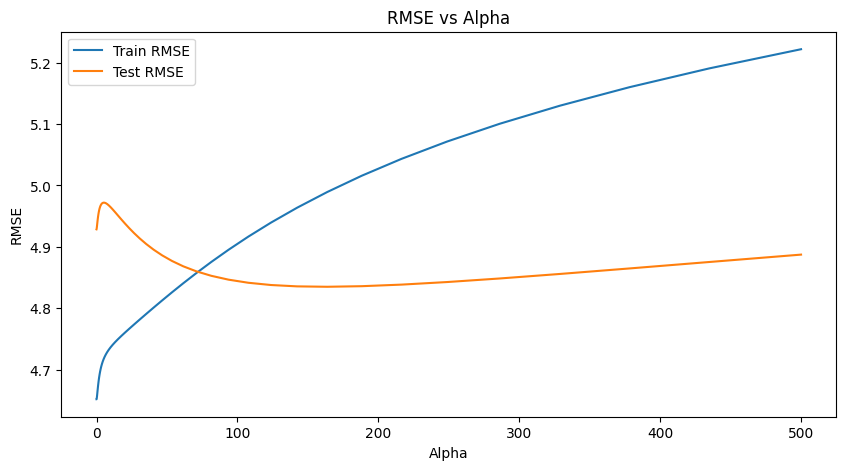

In [6]:
alphas = 10**np.linspace(3, -3, 100) * 0.5

train_r2_scores = []
test_r2_scores = []
train_rmse_scores = []
test_rmse_scores = []

for alpha in alphas:
    model = Ridge(float(alpha))  
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_r2_scores, label='Train R^2')
plt.plot(alphas, test_r2_scores, label='Test R^2')
plt.title('R^2 scores vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_rmse_scores, label='Train RMSE')
plt.plot(alphas, test_rmse_scores, label='Test RMSE')
plt.title('RMSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.



 Ridge regression introduces a regularization parameter (α) that controls the complexity of the model and give the optimal alpha wich results in smallest error.

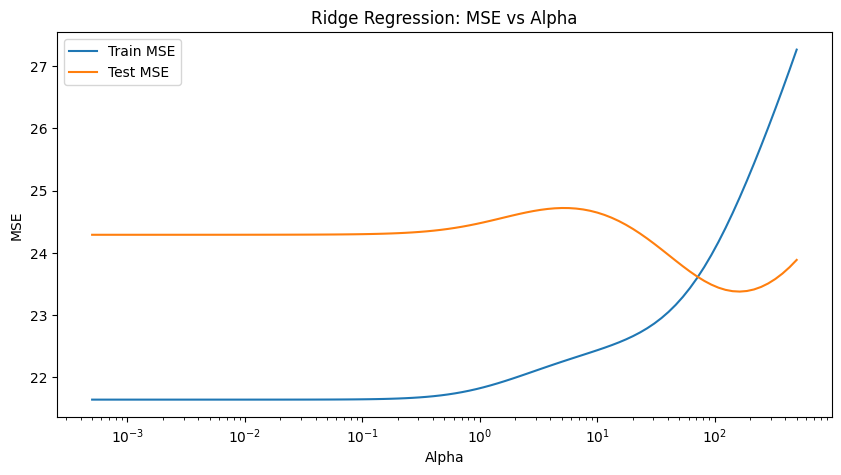

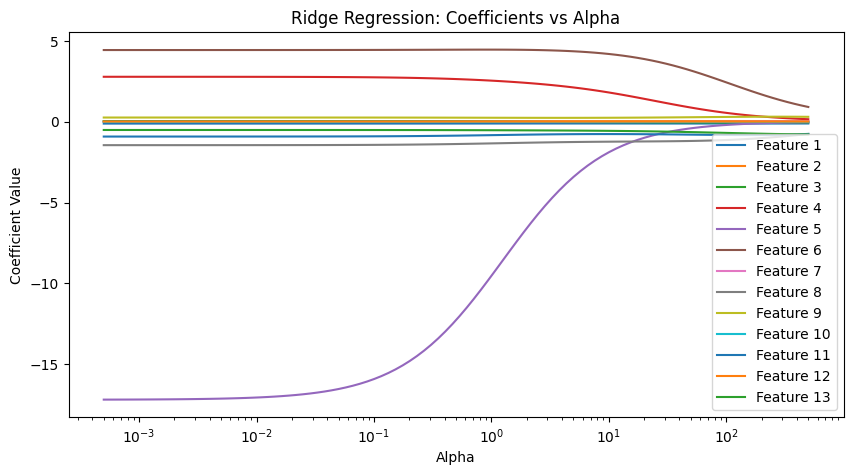

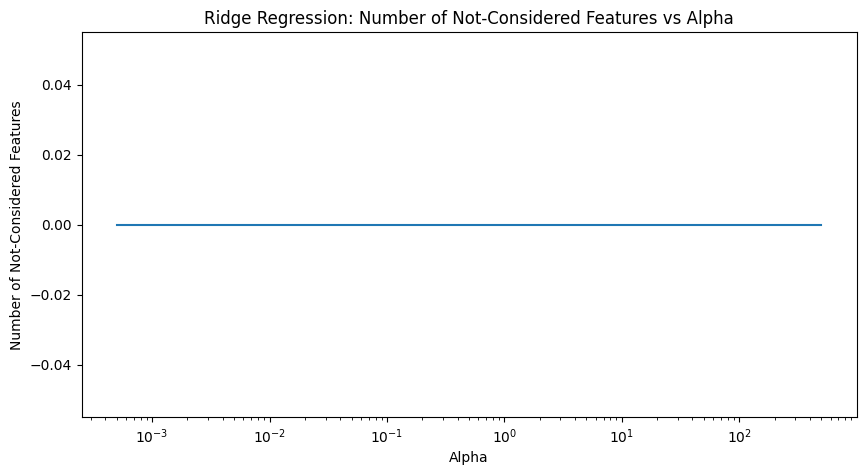

Optimal Alpha: 163.72745814388642
MSE: 23.378168171507383
R^2: 0.6812087531281752
Coefficients:
[-0.11058924  0.03996102 -0.0520014   0.38073404 -0.115418    1.89720331
  0.00709776 -1.05241569  0.3094509  -0.01494741 -0.82272188  0.01159841
 -0.72589539]


In [8]:
train_mse_scores = []
test_mse_scores = []
coefficients = []
num_not_considered_features = []
best_alpha = None
best_mse = float('inf')
for alpha in alphas:
    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    coefficients.append(model.coef_)
    num_not_considered_features.append(np.sum(model.coef_ == 0))
    if test_mse < best_mse:
        best_alpha = alpha
        best_mse = test_mse

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse_scores, label='Train MSE')
plt.plot(alphas, test_mse_scores, label='Test MSE')
plt.title('Ridge Regression: MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.legend()
plt.show()

coefficients = np.array(coefficients)
num_features = coefficients.shape[1]
plt.figure(figsize=(10, 5))
for i in range(num_features):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i+1}')
plt.title('Ridge Regression: Coefficients vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(alphas, num_not_considered_features)
plt.title('Ridge Regression: Number of Not-Considered Features vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.xscale('log')
plt.show()

print("Optimal Alpha:", best_alpha)
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R^2:", r2_test)
print("Coefficients:")
print(best_model.coef_)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

Lasso regression is useful for sparse models and dealing with datasets with a large number of features or high-dimensional datasets. It's also useful when we want to deal with features that are highly correlated with each other.


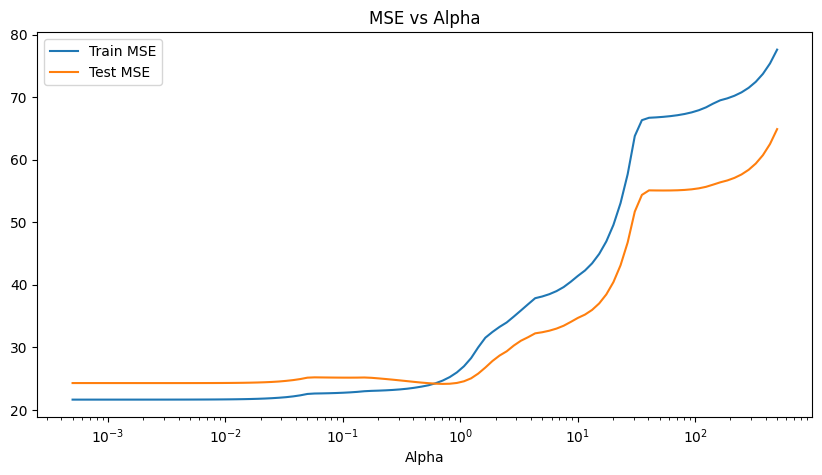

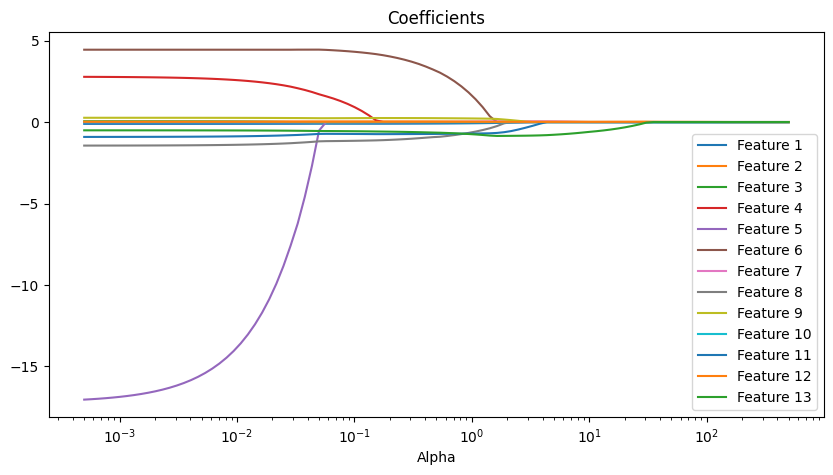

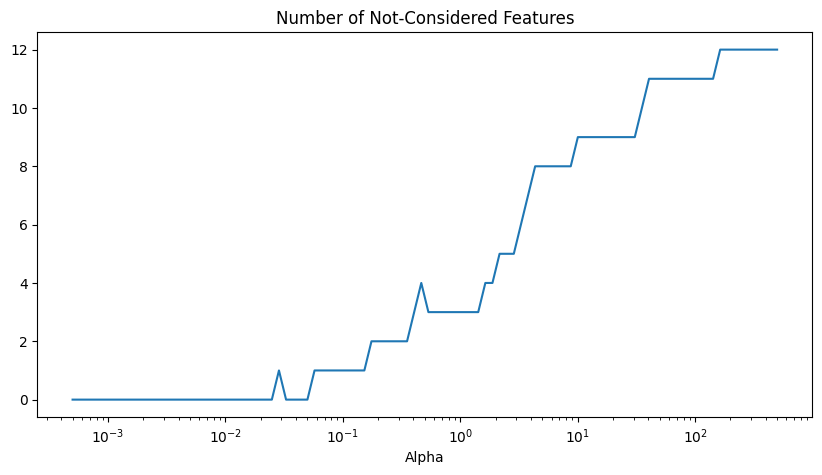

Optimal Alpha: 0.7087370814634024
MSE: 24.153219243073362
R^2: 0.6706399397086963
Coefficients:
[-0.08616746  0.0308067  -0.          0.         -0.          2.50824373
  0.00611413 -0.801558    0.22931102 -0.01270717 -0.72057187  0.01186642
 -0.68953564]


In [11]:
train_mse_scores = []
test_mse_scores = []

coefficients = []
num_not_considered_features = []
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    model = Lasso(alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    coefficients.append(model.coef_)

    num_not_considered_features.append(np.sum(model.coef_ == 0))

    if test_mse < best_mse:
        best_alpha = alpha
        best_mse = test_mse

plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse_scores, label='Train MSE')
plt.plot(alphas, test_mse_scores, label='Test MSE')
plt.title('MSE vs Alpha')
plt.xlabel('Alpha')
plt.xscale('log')
plt.legend()
plt.show()

coefficients = np.array(coefficients)
num_features = coefficients.shape[1]
plt.figure(figsize=(10, 5))
for i in range(num_features):
    plt.plot(alphas, coefficients[:, i], label=f'Feature {i+1}')
plt.title('Coefficients')
plt.xlabel('Alpha')
plt.xscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(alphas, num_not_considered_features)
plt.title('Number of Not-Considered Features')
plt.xlabel('Alpha')
plt.xscale('log')
plt.show()

print("Optimal Alpha:", best_alpha)

best_model = Lasso(best_alpha)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)

print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R^2:", r2_test)
print("Coefficients:")
print(best_model.coef_)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?


The plots we're discussing show how well our models fit data without overfitting. In the first plot, as we change the amount of data and we see how good our model's predictions are compared to real data. If we use too little data for training, our model might memorize the training data too well (overfitting), while too much data might make our model too simple (underfitting). The second plot shows how a special parameter (α) in our models affects their complexity and the balance between making accurate predictions and avoiding overfitting. Higher values of α make our models simpler but riskier for underfitting, while lower values make them more complex but riskier for overfitting. By studying these plots, we can find the best amount of training data and α value for our models, ensuring they make accurate predictions without memorizing the data too much.


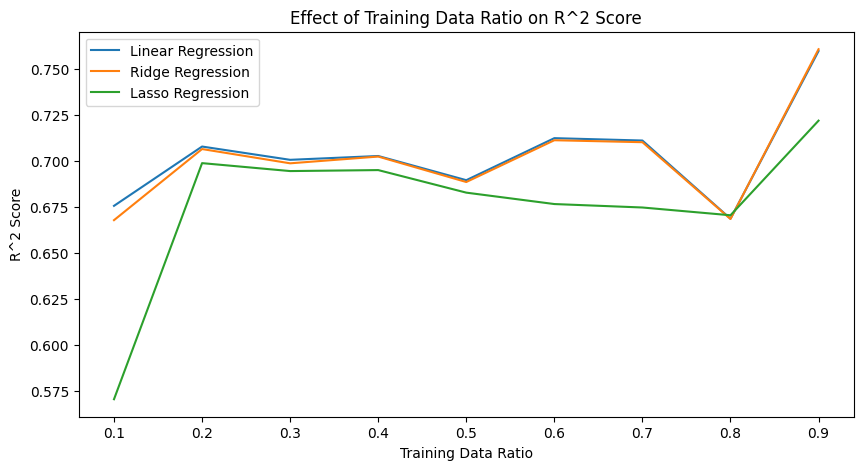

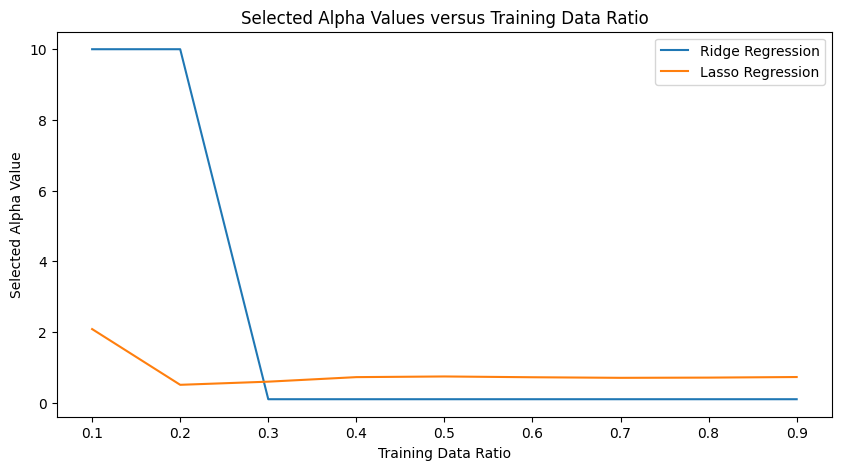

In [21]:
ratios = np.linspace(0.1, 0.9, 9)

linear_r2 = []
lasso_r2 = []
ridge_r2 = []

ridge_alpha = []
lasso_alpha = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - ratio, random_state=42)

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_r2.append(r2_score(y_test, linear_model.predict(X_test)))

    ridge_model = RidgeCV()
    ridge_model.fit(X_train, y_train)
    ridge_r2.append(r2_score(y_test, ridge_model.predict(X_test)))
    ridge_alpha.append(ridge_model.alpha_)

    lasso_model = LassoCV() 
    lasso_model.fit(X_train, y_train)
    lasso_r2.append(r2_score(y_test, lasso_model.predict(X_test)))
    lasso_alpha.append(lasso_model.alpha_)

plt.figure(figsize=(10, 5))
plt.plot(ratios, linear_r2, label='Linear Regression')
plt.plot(ratios, ridge_r2, label='Ridge Regression')
plt.plot(ratios, lasso_r2, label='Lasso Regression')
plt.title('Effect of Training Data Ratio on R^2 Score')
plt.xlabel('Training Data Ratio')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(ratios, ridge_alpha, label='Ridge Regression')
plt.plot(ratios, lasso_alpha, label='Lasso Regression')
plt.title('Selected Alpha Values versus Training Data Ratio')
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected Alpha Value')
plt.legend()
plt.show()



